# Компьютерный практикум
## Домашняя работа 1, модуль 4

###### Бобер Станислав Алексеевич
###### Ст. преп. Департамента Прикладной Математики
###### e-mail: sbober@hse.ru, stas.bober@gmail.com

-----
#### Выполненную работу необходимо загрузить по ссылке:
[ЗАГРУЗИТЬ РЕШЕНИЕ](https://www.dropbox.com/request/bIOWV6R94rHZwx3a643F)



-----
**Решения необходимо выполнить в этом ноутбуке в одной или несколькиих ячейках с кодом,
следующих непосредственно после ячейки с надписью "Задание X", где X - целое число.**

**Каждое решение должно быть рабочим независимо от остального кода в этом ноутбуке.**

-----
#### Задание 0

В архиве `evolution.zip` находятся 360 файлов с именами `evolution_NNN.txt`, где `NNN = 000...359` - номер орбиты. В первом столбце каждого файла записаны расстояния (в км) перицентров орбиты (ближайших к планете точек) на каждый из 225 дней.

Необходимо:
1. Сформировать `DataFrame`, в котором 225 столбцов и 360 строк. Каждая строка соответствует орбите, а столбец - дню. В ячейках записаны расстояния перицентров.
2. Найти номера орбит, расстояние перицентров которых всегда больше 6350 км.
3. Изобразить цветовую карту (`contourf`): по оси абсцисс - номер орбиты, по оси ординат - номер дня, цветом отображены расстояния перицентров. Рядом с цветовой картой изобразить colorbar.
4. Изобразить поверх цветовой карты изолинии (`contour`), соответствующие уровням 6050, 6250, 6350 км.

In [154]:
# подключение модуля и сокращение названия для удобства
import pandas as pd

# для использования функций numpy
import numpy as np
#для отрисовки графиков
import matplotlib.pyplot as plt

import zipfile


z = zipfile.ZipFile('evolution.zip', 'r')

z.extractall()

A = []
#row = []

for name in z.namelist(): #проходимся по именам файлов 
    with open(name, "r") as file:
        contents = file.readlines()#считываем все строки из файла
        row = []
        for i in range(1, len(contents)):
            #row = []
            num = float(((str(contents[i])).split(' '))[0])    
            row.append(num)
        A.append(row)
    file.close()
            

    
z.close() #закроем архив
d=pd.DataFrame(A)#сделаем из списка DataFRame
#d #вывод таблички
#print(d)
#Найти номера орбит, расстояние перицентров которых всегда больше 6350 км.

d_m=d[d>6350] #по всем стоблцам и строкам, если меньше 6350-пишет NaN
#d_m #вывод

#как вывести после этого номера орбит-не знаю


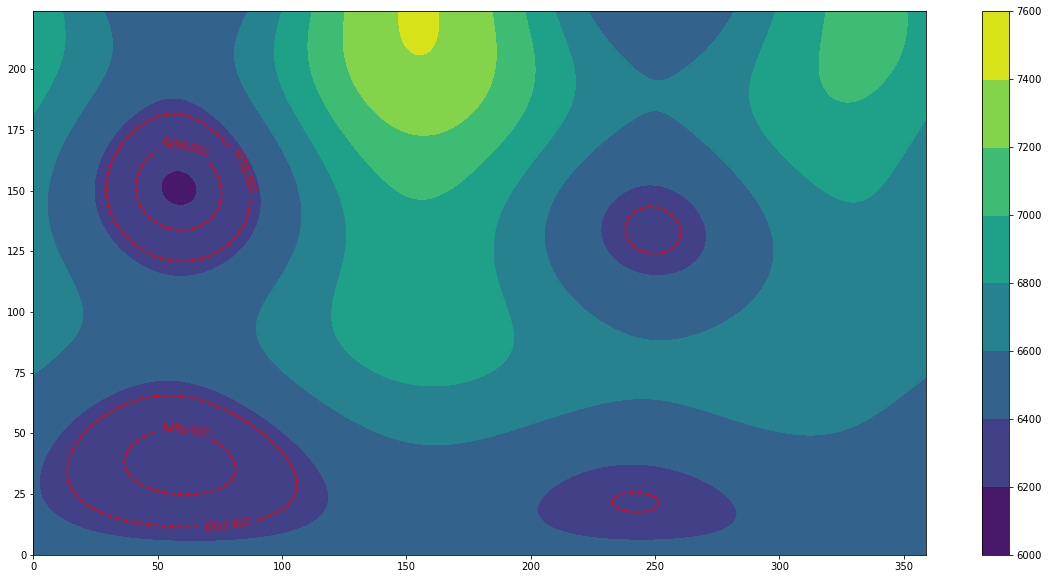

In [152]:
#Изобразить цветовую карту (contourf): 
#по оси абсцисс - номер орбиты, по оси ординат - номер дня, 
#цветом отображены расстояния перицентров.
#Рядом с цветовой картой изобразить colorbar.
plt.figure(figsize=(20,10))
plt.contourf(d[:].T)
plt.colorbar()

#Изобразить поверх цветовой карты изолинии (contour), соответствующие уровням 6050, 6250, 6350 км.

levelss = [6050, 6250, 6350]
cont = plt.contour(d.T, levels=levelss, colors='red', linestyles="dashed")
plt.clabel(cont, fontsize=10,colors='red')
plt.show()

-----
#### Задание 1

В файле `PR_HLY_L1_Sun-Earth (default).npy` находится массив `numpy` с плоскими кривыми - горизонтальными орбитами Ляпунова, лежащими в плоскости XY. Орбиты заданы в полярной системе координат `r-theta` с центром в точке $L_1$, лежащей на оси X. Каждой орбите соответствует строка массива, где записаны длины радиус-векторов каждой точки орбиты от точки $L_1$. Все радиус-вектора соответствуют углам `theta = np.linspace(0., np.pi, 720)`.
Функция `w` определена ниже.

Необходимо: 
1. На каждой орбите найти точку, соответствующую минимуму функции $\omega$
2. Изобразить на графике все орбиты и найденные точки

$ w(x,y) = \frac{x^2 + y^2}{2} + \frac{1 - \mu}{r_1} + \frac{\mu}{r_2} $

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

$ L_1 = 0.9900289479871328 $

Для поиска минимума следует для каждой орбиты:
0. сформировать массивы `r` (строка из файла) и `theta = np.linspace(0., np.pi, 720)`
1. построить сплайн `sr(theta)` при помощи `scipy.interpolate.InterpolatedUnivariateSpline` и данных из `п.0.`
2. написать функцию `rth2xy(r, theta)` для вычисления координат `x-y` по координатам `r-theta` (не забывая, что `r` задан относительно $L_1$)
3. написать функцию вычисления `w(x, y)`
4. написать функцию вычисления `w1(theta) = w(rth2xy(sr(theta), theta))`, используя `пп.1.,2.,3.`
5. минимизировать функцию `w1(theta)` для `theta` на отрезке `[1, 2.2]` при помощи `scipy.optimize.fminbound`
6. по полученному `theta*` вычислить `x*,y* = rth2xy(sr(theta*), theta*)`

-----
#### Задание 2

Рассчитать и изобразить:
- [множество Мандельброта](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0) (четный номер в списке студентов)
- [фрактал Ляпунова](https://ru.wikipedia.org/wiki/%D0%A4%D1%80%D0%B0%D0%BA%D1%82%D0%B0%D0%BB_%D0%9B%D1%8F%D0%BF%D1%83%D0%BD%D0%BE%D0%B2%D0%B0) (нечетный номер в списке студентов)

План решения задачи:
1. написать функцию для расчета в одной точке плоскости (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
2. написать функцию для расчета на прямоугольной равномерной решетке (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
3. выполнить расчет и получить матрицу значений
4. при помощи `imshow` изобразить полученную матрицу (цветовую карту cmap выбрать самостоятельно)
